In [ ]:
!pip install kaggle

#Importing all the dependencies

import (os, cv2, sklearn)

import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications import EfficientNetB0
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
#Access local files

Saving kaggle.json to kaggle.json


In [ ]:
input, output = ([], [])

#Classes of tumor
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
IMAGE_SIZE = 150

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri #'zip-format'

 91% 79.0M/86.8M [00:00<00:00, 207MB/s]
100% 86.8M/86.8M [00:00<00:00, 201MB/s]


In [ ]:
!unzip brain-tumor-classification-mri.zip

In [ ]:
#learning/evaluating sets

for i in labels:
  path = os.path.join('/content/Training',i)
  
  for j in os.listdir(path):
    img = cv2.imread(os.path.join(path,j))
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    input.append(img)
    output.append(i)

  for i in labels:
    path = os.path.join('/content/Testing',i)
    for j in os.listdir(path):
        img = cv2.imread(os.path.join(path,j))
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        input.append(img)
        output.append(i)

In [ ]:
input, output = np.array(input), np.array(output)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input, output, shuffle=True)

In [ ]:
y_train_enc = []

for i in y_train:
  y_train_enc.append(labels.index(i))
  
y_train = keras.utils.to_categorical(y_train_enc)

In [ ]:
y_test_enc = []

for i in y_test:
    y_test_enc.append(labels.index(i))
    
y_test = tf.keras.utils.to_categorical(y_test_enc)

In [ ]:
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
#backbone model with no layers freezed works as well

In [ ]:
layer0 = base_model.output
layer1 = keras.layers.GlobalAveragePooling2D()(layer0)
layer2 = keras.layers.Dropout(.3)(layer1)
layer3 = keras.layers.Dense(4, activation='softmax')(layer2)

In [ ]:
model = keras.Model(inputs=base_model.inputs, outputs=layer3)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    validation_split=.2,
                    epochs=12, batch_size=32)

Epoch 1/12
84/84 [==============================] - 293s 3s/step - loss: 0.4932 - accuracy: 0.8163 - val_loss: 0.3006 - val_accuracy: 0.8951
Epoch 2/12
84/84 [==============================] - 241s 3s/step - loss: 0.1793 - accuracy: 0.9400 - val_loss: 0.3701 - val_accuracy: 0.9205
Epoch 3/12
84/84 [==============================] - 242s 3s/step - loss: 0.1353 - accuracy: 0.9539 - val_loss: 0.3916 - val_accuracy: 0.9025
Epoch 4/12
84/84 [==============================] - 244s 3s/step - loss: 0.0815 - accuracy: 0.9734 - val_loss: 0.4713 - val_accuracy: 0.7976
Epoch 5/12
84/84 [==============================] - 246s 3s/step - loss: 0.1015 - accuracy: 0.9644 - val_loss: 0.4427 - val_accuracy: 0.8951
Epoch 6/12
84/84 [==============================] - 246s 3s/step - loss: 0.0630 - accuracy: 0.9768 - val_loss: 0.2705 - val_accuracy: 0.9295
Epoch 7/12
84/84 [==============================] - 243s 3s/step - loss: 0.0479 - accuracy: 0.9824 - val_loss: 0.1444 - val_accuracy: 0.9715
Epoch 8/12
84

In [ ]:
model.save('mri.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0.5, 0, 'Epochs')

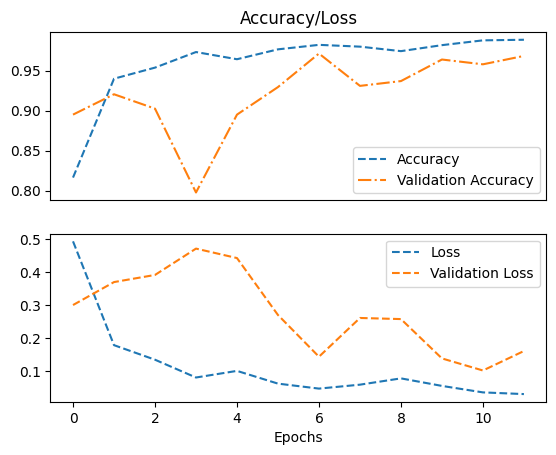

In [ ]:
plt.subplot(2,1,1)
plt.plot([x for x in range(12)], history.history['accuracy'], '--', label='Accuracy')
plt.plot([x for x in range(12)], history.history['val_accuracy'], '-.', label='Validation Accuracy')
plt.legend()
plt.xticks([])
plt.title('Accuracy/Loss')
plt.subplot(2,1,2)
plt.plot([x for x in range(12)], history.history['loss'], '--', label='Loss')
plt.plot([x for x in range(12)], history.history['val_loss'], '--', label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
#some plots for performance

In [ ]:
model.evaluate(X_test, y_test)

35/35 [==============================] - 33s 933ms/step - loss: 0.1154 - accuracy: 0.9721


[0.11540935933589935, 0.972122311592102]